# Building Trees using scikit-learn - Lab

## Introduction
Following the toy example we saw in the previous lesson, we shall now grow a decision tree for a more complex dataset. This lab covers all major areas of standard machine learning practice , from data acquisition to evaluation of results. We shall use scikit learn, pandas and graphviz libraries to conduct this analysis following the example of play tennis dataset.

## Objectives

You will be able to:

- Use pandas to prepare the data for the scikit-learn decision tree algorithm
- Train the classifier with a training dataset and evaluate performance using different measures
- Visualize the decision tree and interpret the visualization

## UCI Banknote Authentication Data Set

In this lab we shall work with a popular dataset for classification called the ["UCI Bank Note Authentication Dataset'](https://archive.ics.uci.edu/ml/datasets/banknote+authentication). This Data were extracted from images that were taken from genuine and forged banknote-like specimens. The notes were first digitized, followed by a numerical transformation using DSP techniques. The final set of engineered features are all continuous in nature (visit the UCI link to learn about feature engineering in detail). 

We have following attributes in the dataset. 

1. __Variance__ of Wavelet Transformed image (continuous) 
2. __Skewness__ of Wavelet Transformed image (continuous) 
3. __Curtosis__ of Wavelet Transformed image (continuous) 
4. __Entropy__ of image (continuous) 
5. __Class__ (integer) - Target/Label 

## Step 1: Import necessary Libraries
- Import necessary libraries as we saw in previous lesson

In [34]:
# Import necessary libraries

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.externals.six import StringIO

from IPython.display import Image

import numpy as np
import pandas as pd
import pydotplus


## Step 2: Import Data
- Read the file `"data_banknote_authentication.csv"` as a pandas dataframe. Note that there is no header information in this dataset.
- Assign column names 'Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class' to dataset in the given order.
- View the basic statistics and shape of dataset.
- Check for frequency of positive and negative examples in the target variable

In [35]:
# Create Dataframe

df = pd.read_csv('data_banknote_authentication.csv')
df.columns = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [36]:
# Describe the dataset

df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000
mean,0.431410,1.917434,1.400694,-1.192200,0.444931
std,2.842494,5.868359,4.310105,2.101683,0.497139
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.774700,-1.711300,-1.553350,-2.417000,0.000000
50%,0.495710,2.313400,0.616630,-0.586650,0.000000
75%,2.814650,6.813100,3.181600,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [37]:
# Shape of dataset

## Your code here 
df.shape

(1371, 5)

In [38]:
# Class frequency of target variable 

## Your code here 
df.Class.value_counts()

0    761
1    610
Name: Class, dtype: int64

## Step 3: Create Features and Labels, Training and Test Data

So now we need to create our feature set X and labels y. 
- Create X and y by selecting the appropriate columns from the dataset
- Create a 80/20 split on the dataset for training/testing. Use random_state=10 for reproducibility

In [39]:
# Create features and labels

## Your code here 
# X = df[['Variance', 'Skewness', 'Curtosis', 'Entropy']]
# y = df['Class']
X = df.drop('Class', axis=1)
y = df['Class']

In [40]:
# Perform an 80/20 split

## Your code here 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)

## Step 4: Train the Classifier and Make PRedictions
- Create an instance of decision tree classifier with random_state=10 for reproducibility
- Fit the traiing data to the model 
- USe the trained model to make predictions with test data

In [41]:
# Train a DT classifier

## Your code here 
dtc = DecisionTreeClassifier(random_state=10)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [42]:
# Make predictions for test data

## Your code here 
y_pred = dtc.predict(X_test)

## Step 5: Check Predictive Performance

We can now use different evaluation measures to check the predictive performance of the classifier. 
- Check the accuracy , AUC and create a confusion matrix 
- Interpret the results 

In [43]:
# Calculate Accuracy , AUC and Confusion matrix 

## Your code here 
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy: {}'.format(acc))

fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print('AUC: {}'.format(round(roc_auc, 2)))

# print('Confusion Matrix')
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

Accuracy: 98.54545454545455
AUC: 0.99


Predicted,0,1,All
True,,,
0,152,4,156
1,0,119,119
All,152,123,275


In [34]:
# Your observations here 


## Step 6: Visualize the tree 

- Use graphviz to visualize the tree 
- Interpret the results 

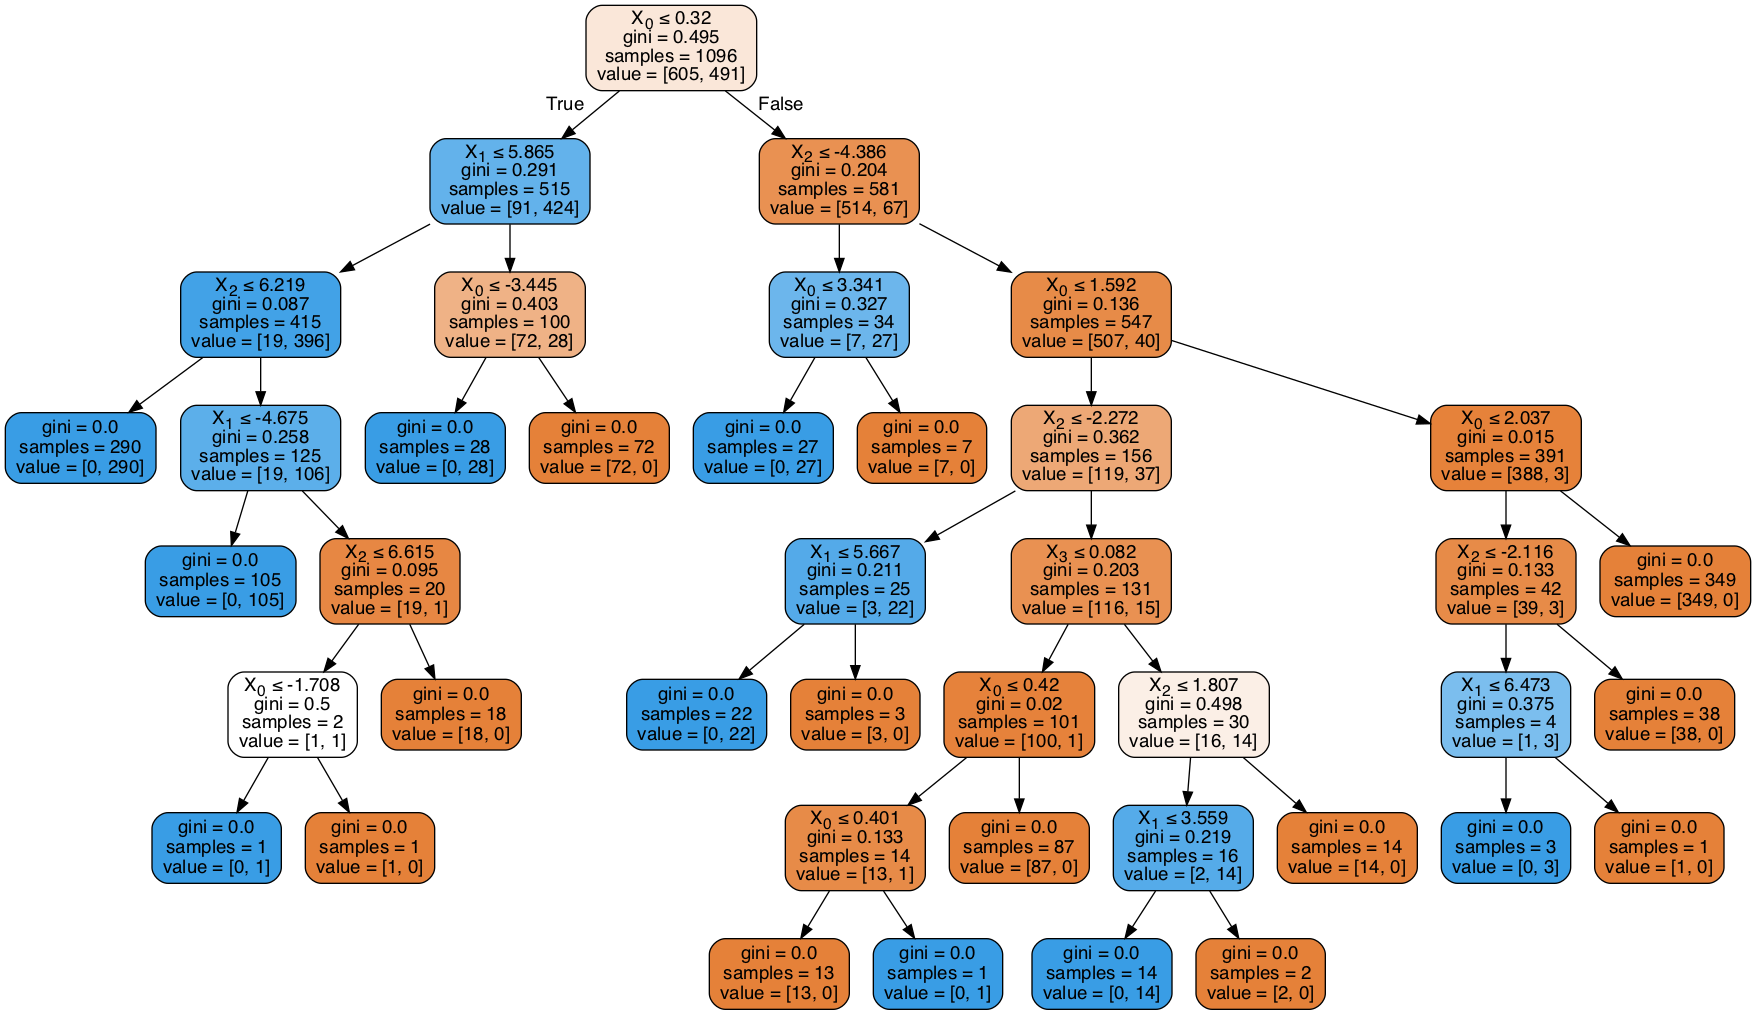

In [44]:
# Visualize the tree trained from complete dataset

## Your code here 
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
## Your observations here


## Bonus: Re-grow the Tree Using Entropy 

SO in the above example, we used all default settings for decision tree classifier. The default impurity crietrion in scikit learn is the Gini impurity. We can change it back to entropy by passing in `criterion='entropy'` argument to the classifier in the training phase. 
- Repeat the above tasks for training, evaluation and visualization using Entropy measure. (
- Compare and interpret the results 

Accuracy: 98.54545454545455
AUC: 0.99
Predicted    0    1  All
True                    
0          152    4  156
1            0  119  119
All        152  123  275


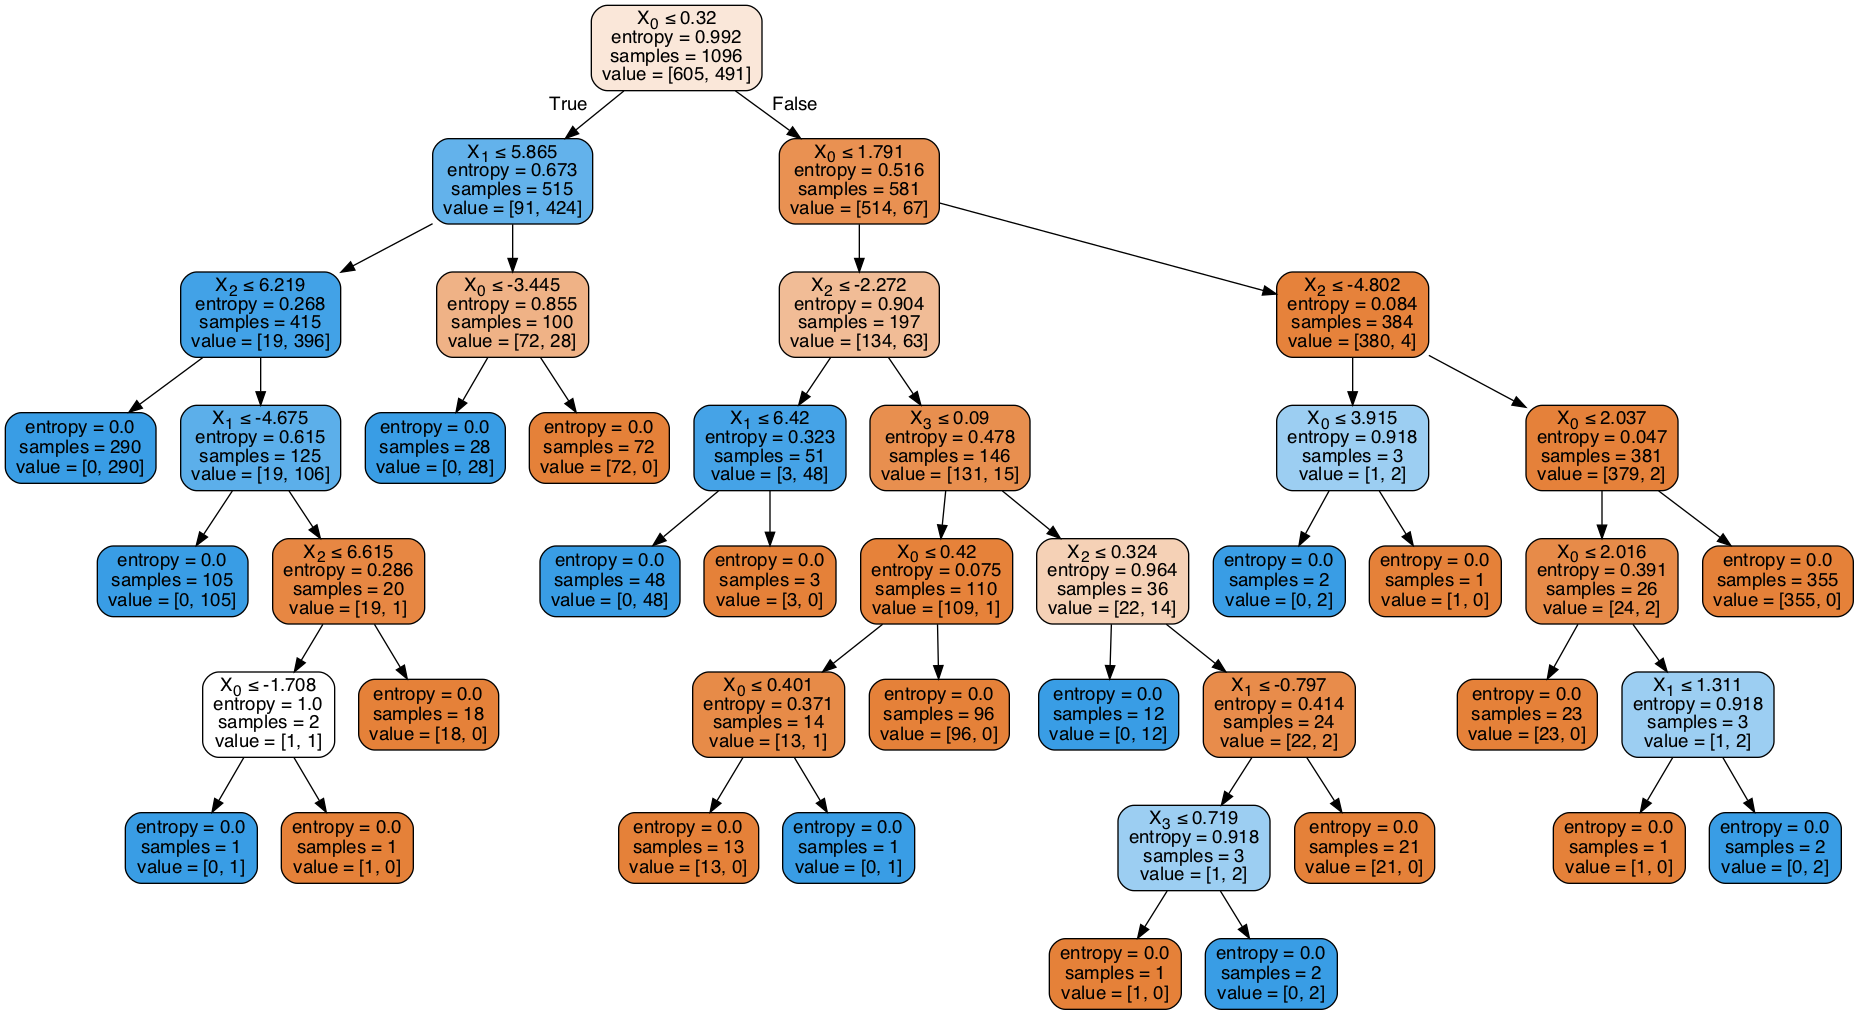

In [46]:
## Your code here 
dtc2 = DecisionTreeClassifier(random_state=10, criterion='entropy')
dtc2.fit(X_train, y_train)

y_pred = dtc2.predict(X_test)

acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy: {}'.format(acc))

fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print('AUC: {}'.format(round(roc_auc, 2)))

# print('Confusion Matrix')
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

dot_data = StringIO()
export_graphviz(dtc2, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [49]:
# Your observations here 

# With entropy we see a much lower accuracy and AUC than earlier
# Only one false positive value , leading to accuracy of 99%
# The tree shape changes considerably with change in impurity criteria 

## Level up - Optional 

- We discussed earlier that decision trees are very sensitive towards outliers. Try to identify and remove/fix any possible outliers in the dataset. 
- Check the distributions of the data. Is there any room for normalization/scaling of data ? Apply these techiques and see if it improves upon accuracy score. 

## Summary 

In this lesson, we looked at growing a decision tree for banknote authentication dataset which is composed of extracted continuous features from photographic data. We looked at different stages of the experiment including data acquisition, training, prediction and evaluation. We also looked at growing trees using entropy vs. gini impurity criteria. In following lessons, we shall look at some more such pre-train tuning techniques for ensuring an optimal classifier for learning and prediction.  